# Tamborlane Data Loader Validation

---

| **Metadata** | **Value** |
|--------------|-----------|
| **Title** | Tamborlane Data Loader Validation |
| **Authors** | Kirpa Chandok & Christopher Risi |
| **Created** | December 2025 |
| **Last Updated** | December 5, 2025 |
| **Dataset** | `Tamborlane` |
| **Notebook ID** | `0.04` |
| **Status** | Complete |

---

## Purpose

This notebook validates that the `tamborlane_2008` data loader correctly:

1. **Loads data from cache** - Verifies cached data loading works properly
2. **Populates all required properties** - Checks all `DatasetBase` properties are accessible
3. **Provides accurate validation statistics** - Confirms metrics and validation tables are correct
4. **Splits data correctly** - Validates train/validation data splits

## Expected Behavior

- All properties from `DatasetBase` should be accessible
- Cached and non-cached loads should produce identical results  
- Train/validation splits should be properly populated
- All public methods should return valid data

## Prerequisites

- Tamborlane dataset downloaded to `cache/data/tamborlane_2008/`
- Python environment with required dependencies installed

---

## 1. Setup and Imports

In [1]:
from src.data.diabetes_datasets.data_loader import get_loader
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

## 2. Load Data (Cached)

In [2]:
loader = get_loader(
    data_source_name="tamborlane_2008",
    dataset_type="train",
    use_cached=True,
    parallel=True,
    max_workers=14,
)

2026-02-13T23:39:27 - ============================================================
2026-02-13T23:39:27 - Beginning Tamborlane 2008 data loading process:
2026-02-13T23:39:27 - 	Dataset: tamborlane_2008 - train
2026-02-13T23:39:27 - 	Columns: None
2026-02-13T23:39:27 - 	Extract features: True
2026-02-13T23:39:27 - 	Generic patient start date: 2008-01-01 00:00:00
2026-02-13T23:39:27 - 	Number of validation days: 20
2026-02-13T23:39:27 - 	Using parallel processing with 14 workers
2026-02-13T23:39:27 - Processing raw data...
2026-02-13T23:39:27 - Loading raw data from: /data/home/cjrisi/nocturnal-hypo-gly-prob-forecast/cache/data/tamborlane_2008/raw
2026-02-13T23:39:27 - Found 19 data files
2026-02-13T23:39:27 - Loading tblADataRTCGM_Blind_Baseline.csv...
2026-02-13T23:39:28 -   Loaded 772061 rows from tblADataRTCGM_Blind_Baseline.csv
2026-02-13T23:39:28 -   Columns: ['RecID', 'PtID', 'DeviceDtTm', 'Glucose']
2026-02-13T23:39:28 - Loading tblADataRTCGM_Unblinded_RTCGMGroup_5.csv...
2026-02-

## 3. Validate Required Properties

Every data loader should implement these properties from `DatasetBase`:

In [3]:
# Property: dataset_name
print(f"Dataset Name: {loader.dataset_name}")
assert loader.dataset_name == "tamborlane_2008", "Dataset name mismatch!"

Dataset Name: tamborlane_2008


In [4]:
# Property: num_patients
print(f"Number of Patients: {loader.num_patients}")
assert loader.num_patients > 0, "No patients loaded!"

Number of Patients: 451


In [5]:
# Property: patient_ids
print(f"Patient IDs: {loader.patient_ids}")
assert len(loader.patient_ids) == loader.num_patients, "Patient ID count mismatch!"

Patient IDs: ['tam_183', 'tam_220', 'tam_411', 'tam_198', 'tam_338', 'tam_233', 'tam_326', 'tam_170', 'tam_295', 'tam_389', 'tam_59', 'tam_162', 'tam_343', 'tam_417', 'tam_56', 'tam_406', 'tam_385', 'tam_464', 'tam_78', 'tam_500', 'tam_280', 'tam_367', 'tam_346', 'tam_483', 'tam_54', 'tam_72', 'tam_154', 'tam_478', 'tam_445', 'tam_177', 'tam_190', 'tam_92', 'tam_270', 'tam_145', 'tam_237', 'tam_386', 'tam_186', 'tam_376', 'tam_449', 'tam_241', 'tam_303', 'tam_57', 'tam_396', 'tam_123', 'tam_354', 'tam_236', 'tam_252', 'tam_14', 'tam_498', 'tam_4', 'tam_494', 'tam_148', 'tam_282', 'tam_259', 'tam_41', 'tam_427', 'tam_341', 'tam_122', 'tam_265', 'tam_221', 'tam_402', 'tam_116', 'tam_23', 'tam_256', 'tam_397', 'tam_161', 'tam_458', 'tam_428', 'tam_325', 'tam_210', 'tam_113', 'tam_12', 'tam_491', 'tam_118', 'tam_136', 'tam_313', 'tam_7', 'tam_143', 'tam_250', 'tam_355', 'tam_380', 'tam_440', 'tam_335', 'tam_356', 'tam_462', 'tam_111', 'tam_51', 'tam_121', 'tam_269', 'tam_66', 'tam_311', 't

In [6]:
# Property: data_shape_summary
print("Data Shape Summary:")
for patient_id, shape in loader.data_shape_summary.items():
    print(f"  {patient_id}: {shape}")

Data Shape Summary:
  tam_183: (37895, 24)
  tam_220: (91717, 24)
  tam_411: (12196, 24)
  tam_198: (40503, 24)
  tam_338: (2778, 24)
  tam_233: (76129, 24)
  tam_326: (46358, 24)
  tam_170: (18004, 24)
  tam_295: (33989, 24)
  tam_389: (45333, 24)
  tam_59: (69030, 24)
  tam_162: (36789, 24)
  tam_343: (59436, 24)
  tam_417: (15192, 24)
  tam_56: (30680, 24)
  tam_406: (50075, 24)
  tam_385: (23283, 24)
  tam_464: (76170, 24)
  tam_78: (34107, 24)
  tam_500: (33816, 24)
  tam_280: (75579, 24)
  tam_367: (74200, 24)
  tam_346: (78262, 24)
  tam_483: (74616, 24)
  tam_54: (33538, 24)
  tam_72: (74422, 24)
  tam_154: (86339, 24)
  tam_478: (48063, 24)
  tam_445: (72230, 24)
  tam_177: (87039, 24)
  tam_190: (50703, 24)
  tam_92: (79093, 24)
  tam_270: (33988, 24)
  tam_145: (22350, 24)
  tam_237: (81199, 24)
  tam_386: (41467, 24)
  tam_186: (24802, 24)
  tam_376: (20496, 24)
  tam_449: (87492, 24)
  tam_241: (42741, 24)
  tam_303: (1809, 24)
  tam_57: (74513, 24)
  tam_396: (30494, 24)


In [7]:
# Property: dataset_info
print("Dataset Info:")
for key, value in loader.dataset_info.items():
    if isinstance(value, dict) and len(str(value)) > 100:
        print(f"  {key}: <dict with {len(value)} items>")
    else:
        print(f"  {key}: {value}")

Dataset Info:
  dataset_name: tamborlane_2008
  num_patients: 451
  patient_ids: ['tam_183', 'tam_220', 'tam_411', 'tam_198', 'tam_338', 'tam_233', 'tam_326', 'tam_170', 'tam_295', 'tam_389', 'tam_59', 'tam_162', 'tam_343', 'tam_417', 'tam_56', 'tam_406', 'tam_385', 'tam_464', 'tam_78', 'tam_500', 'tam_280', 'tam_367', 'tam_346', 'tam_483', 'tam_54', 'tam_72', 'tam_154', 'tam_478', 'tam_445', 'tam_177', 'tam_190', 'tam_92', 'tam_270', 'tam_145', 'tam_237', 'tam_386', 'tam_186', 'tam_376', 'tam_449', 'tam_241', 'tam_303', 'tam_57', 'tam_396', 'tam_123', 'tam_354', 'tam_236', 'tam_252', 'tam_14', 'tam_498', 'tam_4', 'tam_494', 'tam_148', 'tam_282', 'tam_259', 'tam_41', 'tam_427', 'tam_341', 'tam_122', 'tam_265', 'tam_221', 'tam_402', 'tam_116', 'tam_23', 'tam_256', 'tam_397', 'tam_161', 'tam_458', 'tam_428', 'tam_325', 'tam_210', 'tam_113', 'tam_12', 'tam_491', 'tam_118', 'tam_136', 'tam_313', 'tam_7', 'tam_143', 'tam_250', 'tam_355', 'tam_380', 'tam_440', 'tam_335', 'tam_356', 'tam_462'

## 4. Validate Data Containers

Check that `processed_data`, `train_data`, and `validation_data` are properly populated.

In [8]:
# Check processed_data
print("Processed Data:")
assert loader.processed_data is not None, "processed_data is None!"
assert isinstance(loader.processed_data, dict), "processed_data should be a dict!"
print(f"  Type: {type(loader.processed_data).__name__}")
print(f"  Number of patients: {len(loader.processed_data)}")

Processed Data:
  Type: dict
  Number of patients: 451


In [9]:
# Check train_data
print("Train Data:")
assert loader.train_data is not None, "train_data is None!"
assert isinstance(loader.train_data, dict), "train_data should be a dict!"
print(f"  Type: {type(loader.train_data).__name__}")
print(f"  Number of patients: {len(loader.train_data)}")
for patient_id, df in loader.train_data.items():
    print(f"  {patient_id}: {df.shape}")

Train Data:
  Type: dict
  Number of patients: 451
  tam_183: (33779, 24)
  tam_220: (82451, 24)
  tam_411: (10739, 24)
  tam_198: (36371, 24)
  tam_338: (2387, 24)
  tam_233: (68339, 24)
  tam_326: (41555, 24)
  tam_170: (15923, 24)
  tam_295: (30323, 24)
  tam_389: (40691, 24)
  tam_59: (62003, 24)
  tam_162: (32915, 24)
  tam_343: (53363, 24)
  tam_417: (13331, 24)
  tam_56: (27443, 24)
  tam_406: (44723, 24)
  tam_385: (20819, 24)
  tam_464: (68339, 24)
  tam_78: (30611, 24)
  tam_500: (30323, 24)
  tam_280: (67763, 24)
  tam_367: (66611, 24)
  tam_346: (70067, 24)
  tam_483: (66899, 24)
  tam_54: (30035, 24)
  tam_72: (66899, 24)
  tam_154: (77555, 24)
  tam_478: (42995, 24)
  tam_445: (64883, 24)
  tam_177: (77843, 24)
  tam_190: (45299, 24)
  tam_92: (70931, 24)
  tam_270: (30323, 24)
  tam_145: (19955, 24)
  tam_237: (72659, 24)
  tam_386: (36947, 24)
  tam_186: (21971, 24)
  tam_376: (17939, 24)
  tam_449: (78419, 24)
  tam_241: (38387, 24)
  tam_303: (1520, 24)
  tam_57: (668

In [10]:
# Check validation_data
print("Validation Data:")
assert loader.validation_data is not None, "validation_data is None!"
assert isinstance(loader.validation_data, dict), "validation_data should be a dict!"
print(f"  Type: {type(loader.validation_data).__name__}")
print(f"  Number of patients: {len(loader.validation_data)}")
for patient_id, df in loader.validation_data.items():
    print(f"  {patient_id}: {df.shape}")

Validation Data:
  Type: dict
  Number of patients: 451
  tam_183: (4033, 24)
  tam_220: (9217, 24)
  tam_411: (1441, 24)
  tam_198: (4033, 24)
  tam_338: (289, 24)
  tam_233: (7777, 24)
  tam_326: (4609, 24)
  tam_170: (2017, 24)
  tam_295: (3457, 24)
  tam_389: (4609, 24)
  tam_59: (6913, 24)
  tam_162: (3745, 24)
  tam_343: (6049, 24)
  tam_417: (1729, 24)
  tam_56: (3169, 24)
  tam_406: (5185, 24)
  tam_385: (2305, 24)
  tam_464: (7777, 24)
  tam_78: (3457, 24)
  tam_500: (3457, 24)
  tam_280: (7777, 24)
  tam_367: (7489, 24)
  tam_346: (8065, 24)
  tam_483: (7489, 24)
  tam_54: (3457, 24)
  tam_72: (7489, 24)
  tam_154: (8641, 24)
  tam_478: (4897, 24)
  tam_445: (7201, 24)
  tam_177: (8929, 24)
  tam_190: (5185, 24)
  tam_92: (8065, 24)
  tam_270: (3457, 24)
  tam_145: (2305, 24)
  tam_237: (8353, 24)
  tam_386: (4321, 24)
  tam_186: (2593, 24)
  tam_376: (2305, 24)
  tam_449: (8929, 24)
  tam_241: (4321, 24)
  tam_303: (289, 24)
  tam_57: (7489, 24)
  tam_396: (3169, 24)
  tam_1

## 5. Validate Public Methods

In [11]:
# Method: get_patient_data()
sample_patient_id = loader.patient_ids[0]
patient_data = loader.get_patient_data(sample_patient_id)

print(f"get_patient_data('{sample_patient_id}'):")
assert patient_data is not None, "get_patient_data returned None!"
print(f"  Shape: {patient_data.shape}")
print(f"  Columns: {list(patient_data.columns)}")
print(f"  Index type: {type(patient_data.index).__name__}")
print(f"  Date range: {patient_data.index.min()} to {patient_data.index.max()}")

get_patient_data('tam_183'):
  Shape: (37895, 24)
  Columns: ['record_id', 'p_num', 'DeviceDtTm', 'bg_mg_dl', 'bg_mM', 'msg_type', 'datetime', 'glucose_roc', 'glucose_1h_mean', 'glucose_1h_std', 'glucose_3h_mean', 'glucose_3h_std', 'in_range', 'below_range', 'above_range', 'hypo_mild', 'hypo_severe', 'hyper_mild', 'hyper_severe', 'glucose_cv', 'hour', 'day_of_week', 'is_weekend', 'time_of_day']
  Index type: DatetimeIndex
  Date range: 2008-01-01 00:00:00 to 2008-05-11 13:50:00


In [12]:
# Method: get_combined_data()
print("get_combined_data() options:")

combined_all = loader.get_combined_data(data_type="all")
print(f"  data_type='all': {combined_all.shape}")

combined_train = loader.get_combined_data(data_type="train")
print(f"  data_type='train': {combined_train.shape}")

combined_val = loader.get_combined_data(data_type="validation")
print(f"  data_type='validation': {combined_val.shape}")

get_combined_data() options:
  data_type='all': (18165383, 24)
  data_type='train': (16240192, 24)
  data_type='validation': (1866979, 24)


## 6. Validation Statistics

Display comprehensive validation metrics computed by the loader.

In [13]:
# Data metrics (if available)
if hasattr(loader, "data_metrics") and loader.data_metrics:
    print("Data Metrics:")
    for key, value in loader.data_metrics.items():
        if isinstance(value, float):
            print(f"  {key}: {value:.4f}")
        else:
            print(f"  {key}: {value}")
else:
    print("No data_metrics available.")

Data Metrics:
  total_rows: 18165383
  unique_patients: 451
  missing_glucose: 0
  missing_datetime: 0
  glucose_mean: 8.7947
  glucose_std: 3.7223
  glucose_min: 1.1100
  glucose_max: 33.2997
  time_in_range: 64.1271
  time_below_range: 4.5846
  time_above_range: 31.2883
  median_interval_minutes: 5.0000
  mean_interval_minutes: 0.0136
  mean_readings_per_patient: 40278.0111
  std_readings_per_patient: 23581.3839
  min_readings_per_patient: 637
  max_readings_per_patient: 95232


In [14]:
# Create validation table
if hasattr(loader, "create_validation_table"):
    validation_table = loader.create_validation_table()
    print("Validation Table:")
    display(validation_table)
else:
    print("create_validation_table() method not available.")

Validation Table:


,patient_id,num_days,num_data_points,start_date,end_date,date_type,age,sex,avg_bg_mM,min_bg_mM,max_bg_mM,avg_carbs_g,min_carbs_g,max_carbs_g,avg_insulin_units,min_insulin_units,max_insulin_units,num_train_data_points,num_validation_data_points
0,tam_183,132,37895,2008-01-01,2008-05-11 13:50:00,artificial,None,None,11.256647,2.164478,22.255275,None,None,None,None,None,None,33779,4033
1,tam_220,319,91717,2008-01-01,2008-11-14 11:00:00,artificial,None,None,6.819217,2.164478,21.866779,None,None,None,None,None,None,82451,9217
2,tam_411,43,12196,2008-01-01,2008-02-12 08:15:00,artificial,None,None,9.033093,2.219978,21.811280,None,None,None,None,None,None,10739,1441
3,tam_198,141,40503,2008-01-01,2008-05-20 15:10:00,artificial,None,None,8.458586,1.109989,23.365264,None,None,None,None,None,None,36371,4033
4,tam_338,10,2778,2008-01-01,2008-01-10 15:25:00,artificial,None,None,10.721920,1.720483,21.533783,None,None,None,None,None,None,2387,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,tam_50,178,50989,2008-01-01,2008-06-26 01:00:00,artificial,None,None,8.019971,1.331987,31.412683,None,None,None,None,None,None,45587,5185
447,tam_495,91,26044,2008-01-01,2008-03-31 10:15:00,artificial,None,None,7.759254,1.775982,26.417733,None,None,None,None,None,None,23411,2593
448,tam_387,295,84747,2008-01-01,2008-10-21 06:10:00,artificial,None,None,9.265131,1.553984,32.966667,None,None,None,None,None,None,76106,8641
449,tam_194,164,47115,2008-01-01,2008-06-12 14:10:00,artificial,None,None,8.721681,1.165488,24.697251,None,None,None,None,None,None,42131,4897


### 6.1 Data Distribution Visualizations

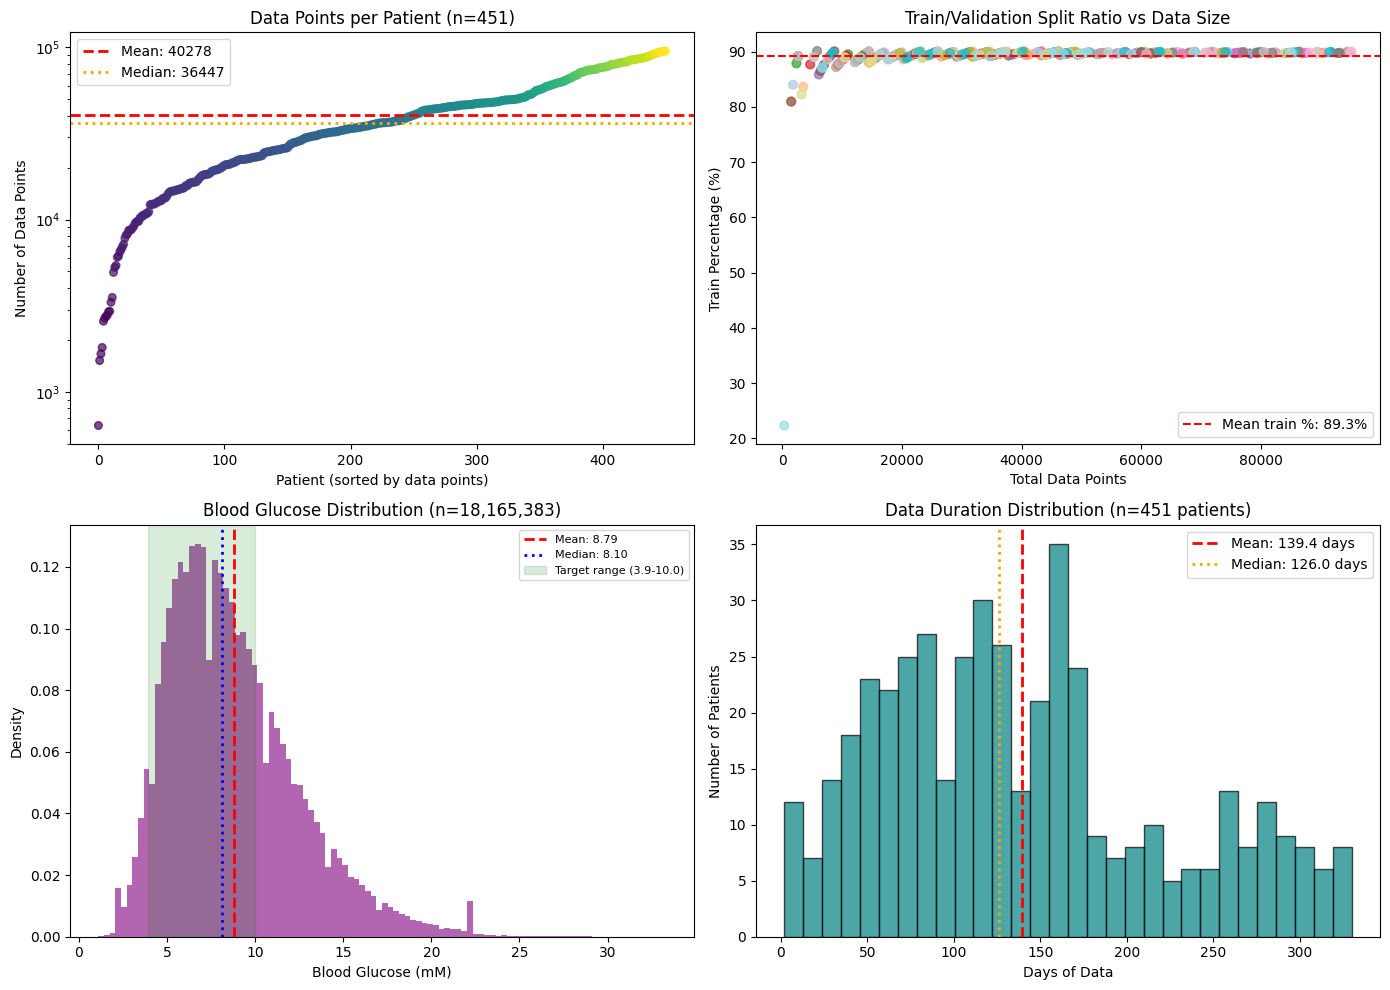

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

patient_ids = list(loader.processed_data.keys())
data_points = [len(df) for df in loader.processed_data.values()]

# Plot 1: Scatter plot of data points per patient (sorted by size)
ax1 = axes[0, 0]
sorted_indices = np.argsort(data_points)
sorted_points = np.array(data_points)[sorted_indices]
ax1.scatter(
    range(len(patient_ids)),
    sorted_points,
    c=sorted_points,
    cmap="viridis",
    s=30,
    alpha=0.7,
)
ax1.axhline(
    y=np.mean(data_points),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(data_points):.0f}",
)
ax1.axhline(
    y=np.median(data_points),
    color="orange",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(data_points):.0f}",
)
ax1.set_xlabel("Patient (sorted by data points)")
ax1.set_ylabel("Number of Data Points")
ax1.set_title(f"Data Points per Patient (n={len(patient_ids)})")
ax1.legend()
ax1.set_yscale("log") if max(data_points) / min(data_points) > 10 else None

# Plot 2: Train vs Validation ratio scatter
ax2 = axes[0, 1]
if loader.train_data and loader.validation_data:
    train_points = [len(loader.train_data.get(pid, [])) for pid in patient_ids]
    val_points = [len(loader.validation_data.get(pid, [])) for pid in patient_ids]
    total_points = [t + v for t, v in zip(train_points, val_points)]
    train_ratio = [
        t / tot * 100 if tot > 0 else 0 for t, tot in zip(train_points, total_points)
    ]

    scatter = ax2.scatter(
        total_points,
        train_ratio,
        c=range(len(patient_ids)),
        cmap="tab20",
        s=40,
        alpha=0.7,
    )
    ax2.axhline(
        y=np.mean(train_ratio),
        color="red",
        linestyle="--",
        label=f"Mean train %: {np.mean(train_ratio):.1f}%",
    )
    ax2.set_xlabel("Total Data Points")
    ax2.set_ylabel("Train Percentage (%)")
    ax2.set_title("Train/Validation Split Ratio vs Data Size")
    ax2.legend()
else:
    ax2.text(
        0.5,
        0.5,
        "No train/validation split available",
        ha="center",
        va="center",
        transform=ax2.transAxes,
    )

# Plot 3: Blood glucose distribution (histogram with KDE-style smoothing)
ax3 = axes[1, 0]
combined_data = loader.get_combined_data(data_type="all")
bg_col = (
    "bg_mM"
    if "bg_mM" in combined_data.columns
    else "bg_mg_dl"
    if "bg_mg_dl" in combined_data.columns
    else None
)

if bg_col:
    bg_data = combined_data[bg_col].dropna()
    bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"
    hypo = 3.9 if bg_col == "bg_mM" else 70
    hyper = 10.0 if bg_col == "bg_mM" else 180

    ax3.hist(
        bg_data, bins=100, density=True, color="purple", edgecolor="none", alpha=0.6
    )
    ax3.axvline(
        x=bg_data.mean(),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {bg_data.mean():.2f}",
    )
    ax3.axvline(
        x=bg_data.median(),
        color="blue",
        linestyle=":",
        linewidth=2,
        label=f"Median: {bg_data.median():.2f}",
    )
    ax3.axvspan(
        hypo, hyper, alpha=0.15, color="green", label=f"Target range ({hypo}-{hyper})"
    )
    ax3.set_xlabel(f"Blood Glucose ({bg_unit})")
    ax3.set_ylabel("Density")
    ax3.set_title(f"Blood Glucose Distribution (n={len(bg_data):,})")
    ax3.legend(fontsize=8)
else:
    ax3.text(
        0.5,
        0.5,
        "No blood glucose column found",
        ha="center",
        va="center",
        transform=ax3.transAxes,
    )

# Plot 4: Data duration distribution (histogram)
ax4 = axes[1, 1]
durations = []
for pid, df in loader.processed_data.items():
    if hasattr(df.index, "min") and hasattr(df.index, "max"):
        try:
            duration = (df.index.max() - df.index.min()).days
            durations.append(duration)
        except (TypeError, AttributeError):
            pass

if durations:
    ax4.hist(
        durations,
        bins=min(30, len(set(durations))),
        color="teal",
        edgecolor="black",
        alpha=0.7,
    )
    ax4.axvline(
        x=np.mean(durations),
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Mean: {np.mean(durations):.1f} days",
    )
    ax4.axvline(
        x=np.median(durations),
        color="orange",
        linestyle=":",
        linewidth=2,
        label=f"Median: {np.median(durations):.1f} days",
    )
    ax4.set_xlabel("Days of Data")
    ax4.set_ylabel("Number of Patients")
    ax4.set_title(f"Data Duration Distribution (n={len(durations)} patients)")
    ax4.legend()

plt.tight_layout()
plt.show()

### 6.2 Per-Patient Blood Glucose Statistics

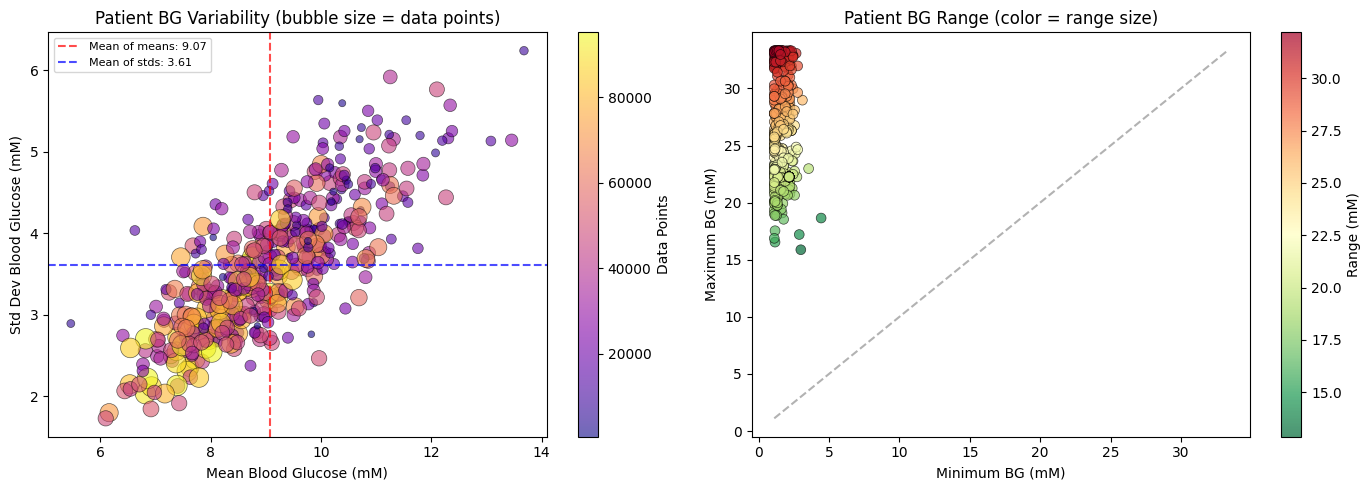


Summary across 451 patients:
  Mean BG: 9.07 ± 1.33 mM
  Mean Std Dev: 3.61 ± 0.82 mM
  Mean Range: 24.00 mM


In [16]:
# Per-patient BG statistics - scatter plot visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

patient_ids = list(loader.processed_data.keys())

# Determine which BG column to use
bg_col = "bg_mM" if "bg_mM" in loader.get_combined_data().columns else "bg_mg_dl"
bg_unit = "mM" if bg_col == "bg_mM" else "mg/dL"

# Calculate per-patient statistics
patient_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        if len(bg) > 0:
            patient_stats.append(
                {
                    "pid": pid,
                    "mean": bg.mean(),
                    "std": bg.std(),
                    "min": bg.min(),
                    "max": bg.max(),
                    "count": len(bg),
                }
            )

# Plot 1: Mean vs Std scatter (bubble size = data count)
ax1 = axes[0]
means = [s["mean"] for s in patient_stats]
stds = [s["std"] for s in patient_stats]
counts = [s["count"] for s in patient_stats]

# Normalize counts for bubble size
size_scale = np.array(counts) / max(counts) * 200 + 20

scatter = ax1.scatter(
    means,
    stds,
    s=size_scale,
    c=counts,
    cmap="plasma",
    alpha=0.6,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel(f"Mean Blood Glucose ({bg_unit})")
ax1.set_ylabel(f"Std Dev Blood Glucose ({bg_unit})")
ax1.set_title("Patient BG Variability (bubble size = data points)")
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label("Data Points")

# Add overall mean lines
ax1.axvline(
    x=np.mean(means),
    color="red",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of means: {np.mean(means):.2f}",
)
ax1.axhline(
    y=np.mean(stds),
    color="blue",
    linestyle="--",
    alpha=0.7,
    label=f"Mean of stds: {np.mean(stds):.2f}",
)
ax1.legend(fontsize=8)

# Plot 2: Min-Max range scatter
ax2 = axes[1]
mins = [s["min"] for s in patient_stats]
maxs = [s["max"] for s in patient_stats]
ranges = [s["max"] - s["min"] for s in patient_stats]

scatter2 = ax2.scatter(
    mins,
    maxs,
    s=50,
    c=ranges,
    cmap="RdYlGn_r",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax2.plot(
    [min(mins), max(maxs)],
    [min(mins), max(maxs)],
    "k--",
    alpha=0.3,
    label="Min=Max line",
)
ax2.set_xlabel(f"Minimum BG ({bg_unit})")
ax2.set_ylabel(f"Maximum BG ({bg_unit})")
ax2.set_title("Patient BG Range (color = range size)")
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label(f"Range ({bg_unit})")

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary across {len(patient_stats)} patients:")
print(f"  Mean BG: {np.mean(means):.2f} ± {np.std(means):.2f} {bg_unit}")
print(f"  Mean Std Dev: {np.mean(stds):.2f} ± {np.std(stds):.2f} {bg_unit}")
print(f"  Mean Range: {np.mean(ranges):.2f} {bg_unit}")

### 6.3 Time-in-Range Analysis

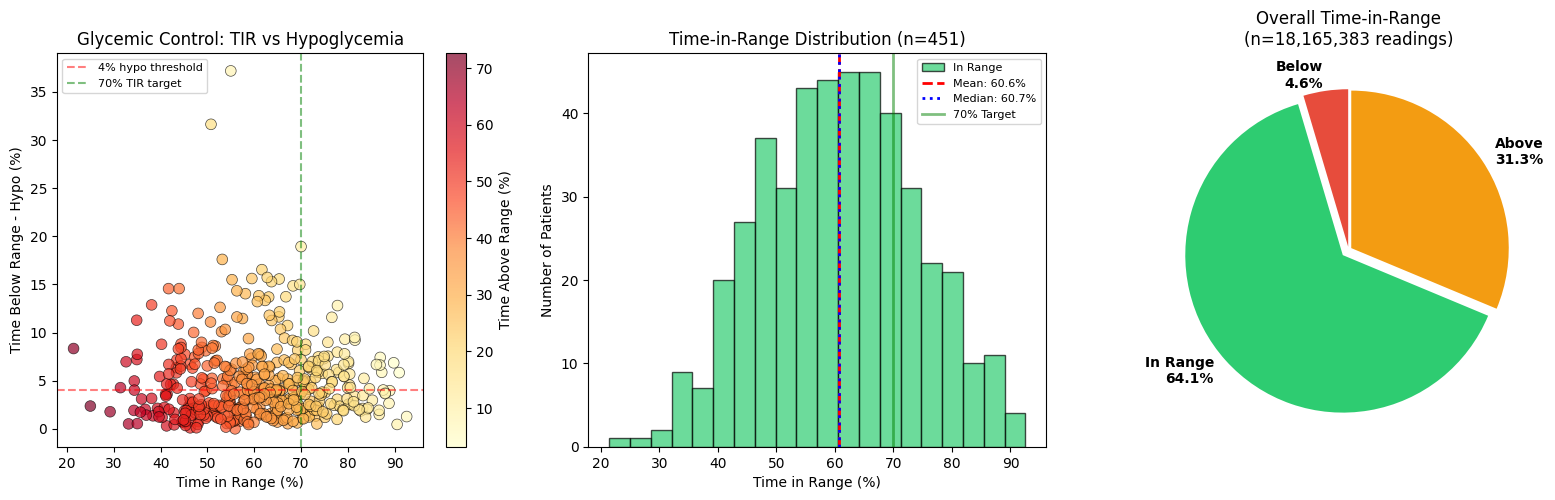


Time-in-Range Summary (451 patients):
  Mean TIR: 60.6% (target: >70%)
  Mean Time Below: 4.8% (target: <4%)
  Mean Time Above: 34.5% (target: <25%)
  Patients meeting 70% TIR: 113/451


In [17]:
# Time-in-Range Analysis - scatter and distribution plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Define thresholds based on unit
if bg_col == "bg_mM":
    target_low, target_high = 3.9, 10.0
else:
    target_low, target_high = 70, 180

# Calculate time-in-range for each patient
tir_stats = []
for pid in patient_ids:
    df = loader.processed_data[pid]
    if bg_col in df.columns:
        bg = df[bg_col].dropna()
        total = len(bg)
        if total > 0:
            below = (bg < target_low).sum() / total * 100
            above = (bg > target_high).sum() / total * 100
            in_range = 100 - below - above
            tir_stats.append(
                {
                    "pid": pid,
                    "below": below,
                    "in_range": in_range,
                    "above": above,
                    "count": total,
                }
            )

below_pcts = [s["below"] for s in tir_stats]
in_range_pcts = [s["in_range"] for s in tir_stats]
above_pcts = [s["above"] for s in tir_stats]
counts = [s["count"] for s in tir_stats]

# Plot 1: Scatter - Time in Range vs Time Below (hypo risk visualization)
ax1 = axes[0]
scatter1 = ax1.scatter(
    in_range_pcts,
    below_pcts,
    s=60,
    c=above_pcts,
    cmap="YlOrRd",
    alpha=0.7,
    edgecolors="black",
    linewidth=0.5,
)
ax1.set_xlabel("Time in Range (%)")
ax1.set_ylabel("Time Below Range - Hypo (%)")
ax1.set_title("Glycemic Control: TIR vs Hypoglycemia")
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label("Time Above Range (%)")
ax1.axhline(y=4, color="red", linestyle="--", alpha=0.5, label="4% hypo threshold")
ax1.axvline(x=70, color="green", linestyle="--", alpha=0.5, label="70% TIR target")
ax1.legend(fontsize=8)

# Plot 2: Distribution of Time-in-Range (histogram)
ax2 = axes[1]
ax2.hist(
    in_range_pcts,
    bins=20,
    color="#2ECC71",
    edgecolor="black",
    alpha=0.7,
    label="In Range",
)
ax2.axvline(
    x=np.mean(in_range_pcts),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {np.mean(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=np.median(in_range_pcts),
    color="blue",
    linestyle=":",
    linewidth=2,
    label=f"Median: {np.median(in_range_pcts):.1f}%",
)
ax2.axvline(
    x=70, color="green", linestyle="-", linewidth=2, alpha=0.5, label="70% Target"
)
ax2.set_xlabel("Time in Range (%)")
ax2.set_ylabel("Number of Patients")
ax2.set_title(f"Time-in-Range Distribution (n={len(tir_stats)})")
ax2.legend(fontsize=8)

# Plot 3: Overall cohort pie chart
ax3 = axes[2]
combined_bg = loader.get_combined_data()[bg_col].dropna()
total = len(combined_bg)

if total > 0:
    overall_below = (combined_bg < target_low).sum() / total * 100
    overall_above = (combined_bg > target_high).sum() / total * 100
    overall_in_range = 100 - overall_below - overall_above

    sizes = [overall_below, overall_in_range, overall_above]
    labels = [
        f"Below\n{overall_below:.1f}%",
        f"In Range\n{overall_in_range:.1f}%",
        f"Above\n{overall_above:.1f}%",
    ]
    colors = ["#E74C3C", "#2ECC71", "#F39C12"]
    explode = (0.02, 0.05, 0.02)

    wedges, texts = ax3.pie(
        sizes,
        labels=labels,
        colors=colors,
        explode=explode,
        startangle=90,
        textprops={"fontsize": 10, "fontweight": "bold"},
    )
    ax3.set_title(f"Overall Time-in-Range\n(n={total:,} readings)")

plt.tight_layout()
plt.show()

# Print TIR summary
print(f"\nTime-in-Range Summary ({len(tir_stats)} patients):")
print(f"  Mean TIR: {np.mean(in_range_pcts):.1f}% (target: >70%)")
print(f"  Mean Time Below: {np.mean(below_pcts):.1f}% (target: <4%)")
print(f"  Mean Time Above: {np.mean(above_pcts):.1f}% (target: <25%)")
print(
    f"  Patients meeting 70% TIR: {sum(1 for t in in_range_pcts if t >= 70)}/{len(tir_stats)}"
)

## 7. Sample Data Inspection

Quick look at the actual data content for one patient.

In [ ]:
sample_patient_id = loader.patient_ids[0]
sample_df = loader.get_patient_data(sample_patient_id)

print(f"Sample data for patient '{sample_patient_id}':")
print("\nFirst 5 rows:")
display(sample_df.head())

print("\nLast 5 rows:")
display(sample_df.tail())

print("\nData types:")
print(sample_df.dtypes)

In [ ]:
# Basic statistics for numeric columns
print(f"\nDescriptive statistics for patient '{sample_patient_id}':")
display(sample_df.describe())

## 8. Validation Summary

Final checks to confirm the data loader is working correctly.

In [ ]:
print("=" * 60)
print("VALIDATION SUMMARY")
print("=" * 60)

checks = [
    ("dataset_name property", loader.dataset_name is not None),
    ("num_patients property", loader.num_patients > 0),
    ("patient_ids property", len(loader.patient_ids) > 0),
    (
        "processed_data populated",
        loader.processed_data is not None and len(loader.processed_data) > 0,
    ),
    (
        "train_data populated",
        loader.train_data is not None and len(loader.train_data) > 0,
    ),
    (
        "validation_data populated",
        loader.validation_data is not None and len(loader.validation_data) > 0,
    ),
    (
        "get_patient_data() works",
        loader.get_patient_data(loader.patient_ids[0]) is not None,
    ),
    ("get_combined_data() works", not loader.get_combined_data().empty),
]

all_passed = True
for check_name, passed in checks:
    status = "✅ PASS" if passed else "❌ FAIL"
    print(f"  {status}: {check_name}")
    if not passed:
        all_passed = False

print("=" * 60)
if all_passed:
    print("All validation checks PASSED!")
else:
    print("Some validation checks FAILED. Please review.")